In [1]:
from packages import *
import EOFsfunction 
import Soil_moisture_weights
import data_spliting 

In [2]:
import cartopy as cart
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [3]:
# path = "/scratch/ksilwimba/Data/US_data/"
# data_EX3  = xr.open_dataset(path + "/CLM5_experiment_3_US_1980-2010.nc")

In [4]:
us_lat_bounds = (24.0, 50.0)
us_lon_bounds = (360-126.0, 360-66.0)
# landmask = xr.open_mfdataset(CLM5_Exp1).sel(lat=slice(*us_lat_bounds), lon=slice(*us_lon_bounds)).landmask

CLM5_Exp3 = glob.glob("/scratch/leaf/SP-MIP/CLM5_experiment_3*")
data_EX3 = xr.open_mfdataset(CLM5_Exp3).sel(lat=slice(*us_lat_bounds), lon=slice(*us_lon_bounds))

In [5]:
# exp3_soilm_weighted_ave = Soil_moisture_weights.soil_weighted_ave(data_EX3)

In [6]:
n_eof = 5
exp3_mrlsl = data_EX3.mrlsl.sel(levsoi=slice(0,12)).mean('levsoi').groupby('time.year').mean('time').isel()*0.38882259051005047
eofs3, pcs3, var_fracs3, lambdas3, eofs_corr3, eof_corrpcs3,reconstruction3 = EOFsfunction.Emp_Ortho_Funcs(exp3_mrlsl, n_eof)

...Detrending the Data by removing the time-mean...
....Checking Setting Weighting...
....Decomposing Modes of SPMIP Data...
...Correlating.....


In [7]:
Exp3_mrlsl = data_EX3['mrlsl'].sel(levsoi=slice(0,12)).mean('levsoi').groupby('time.month').mean('time').mean(dim=("lat","lon"))*0.3715504356225332
Exp3_tsl = data_EX3['tsl'].sel(levgrnd=slice(0,2.1)).mean('levgrnd').groupby('time.month').mean('time').mean(dim=("lat","lon"))
snm_Exp3 = data_EX3['snm'].groupby('time.month').mean('time').mean(dim=("lat","lon"))
Exp3_et = data_EX3['et'].groupby('time.month').mean('time').mean(dim=("lat","lon"))

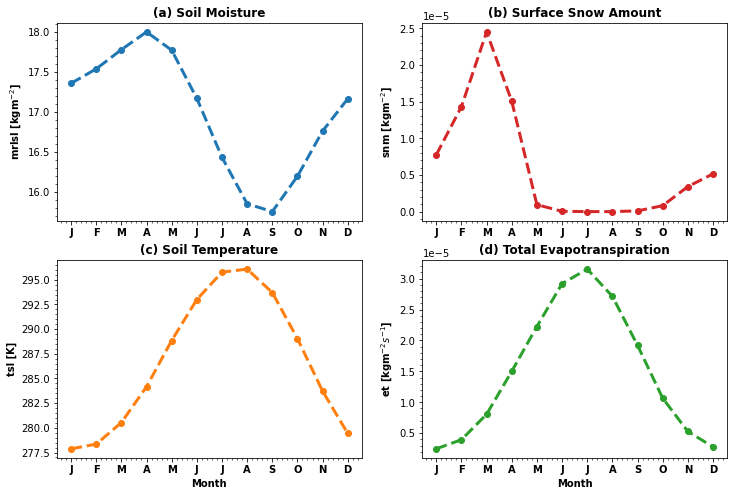

In [10]:
fig = plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.plot(Exp3_mrlsl.month, Exp3_mrlsl, linewidth=3,label="Exp-3-Control run",linestyle='dashed',  marker="o")
plt.ylabel("mrlsl [kgm$^{-2}$]", fontweight='bold', fontsize=10)
plt.xticks(np.arange(12)+1, ['J','F','M','A','M','J','J','A','S','O','N','D'],fontweight='bold', fontsize=10)
plt.title("(a) Soil Moisture",fontweight='bold', fontsize=12 )
#plt.xlabel('Month',fontweight='bold', fontsize=12)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')
#plt.grid()

plt.subplot(2,2,2)
plt.plot(Exp3_mrlsl.month, snm_Exp3, linewidth=3,label="Exp-3-Control run",linestyle='dashed',color = 'C3',  marker="o")
plt.ylabel("snm [kgm$^{-2}$]", fontweight='bold', fontsize=10)
plt.xticks(np.arange(12)+1, ['J','F','M','A','M','J','J','A','S','O','N','D'],fontweight='bold', fontsize=10)
plt.title("(b) Surface Snow Amount",fontweight='bold', fontsize=12 )
#plt.xlabel('Month',fontweight='bold', fontsize=12)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')
#plt.grid()


plt.subplot(2,2,3)
plt.plot(Exp3_mrlsl.month, Exp3_tsl, linewidth=3,label="Exp-3-Control run",linestyle='dashed',color = 'C1',  marker="o")
plt.ylabel("tsl [K]", fontweight='bold', fontsize=10)
plt.xticks(np.arange(12)+1, ['J','F','M','A','M','J','J','A','S','O','N','D'],fontweight='bold', fontsize=10)
plt.title("(c) Soil Temperature",fontweight='bold', fontsize=12 )
plt.xlabel('Month',fontweight='bold', fontsize=10)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')
#plt.grid()


plt.subplot(2,2,4)
plt.plot(Exp3_mrlsl.month, Exp3_et, linewidth=3,label="Exp-3 Default soil parameters maps",linestyle='dashed',color = 'C2',  marker="o")
plt.ylabel("et [kgm$^{-2}s^{-1}$]",fontweight='bold', fontsize=10)
plt.xticks(np.arange(12)+1, ['J','F','M','A','M','J','J','A','S','O','N','D'],fontweight='bold', fontsize=10)
plt.title("(d) Total Evapotranspiration",fontweight='bold',  fontsize=12 )
plt.xlabel('Month',fontweight='bold', fontsize=10)
plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')
#plt.grid()

In [12]:
def make_contour_plot(eofs, var_fracs, ax_index, title):
    #=================== Choose the Multi-model ensemble (MME) and week1 (time index of 0)
    data, lons = add_cyclic_point(eofs, coord=exp3_mrlsl['lon'])

    #=================== Make a filled contour plot
    cs = ax[ax_index].contourf(lons, exp3_mrlsl['lat'], data, transform=ccrs.PlateCarree(),
                               cmap='RdBu_r', extend='both')
    states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',scale='50m',facecolor='none')
    ax[ax_index].add_feature(states, edgecolor='gray')
    ax[ax_index].set_title(title, fontweight='bold', fontsize=10, loc='left')
    ax[ax_index].set_title(f"Expl. Var. {(var_fracs*100).round(2)}%", loc='right', fontweight='bold', size=10)

    #=================== Add coastlines
    ax[ax_index].coastlines()
    #ax[ax_index].gridlines(alpha=0.5)

    #=================== Define the xticks for longitude
    ax[ax_index].set_xticks(np.arange(-126, -66, 10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
#     ax[ax_index].xaxis.set_major_formatter(lon_formatter)

    #=================== Define the yticks for latitude
    ax[ax_index].set_yticks(np.arange(24, 50, 5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
#     ax[ax_index].yaxis.set_major_formatter(lat_formatter)

    ax[ax_index].add_feature(cfeature.BORDERS, linestyle='-')
    ax[ax_index].add_feature(cfeature.COASTLINE)

    return cs



#============================================EOF Time Series 
def plot_eofs_over_time(years, eof_amplitudes, eof_labels, title, xlabel, ylabel):
    plt.figure(figsize=(13,4))
    for i in range(len(eof_amplitudes)):
        plt.plot(years, np.delete(eof_amplitudes[i],-1), label=eof_labels[i], linewidth=3, linestyle='dashed', marker="o")
    plt.xlabel(xlabel, fontweight='bold', fontsize=12)
    plt.ylabel(ylabel, fontweight='bold', fontsize=12)
    plt.title(title, fontweight='bold', loc='left', size=12)
    plt.legend(loc="upper right", fontsize=8)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.axhline(0, color='k')
    plt.minorticks_on()
    plt.grid(linestyle=':', linewidth=0.5, color='k')
    plt.subplots_adjust(left=-0.19, right=0.8, top=0.8, bottom=0.1)
    plt.show()
    

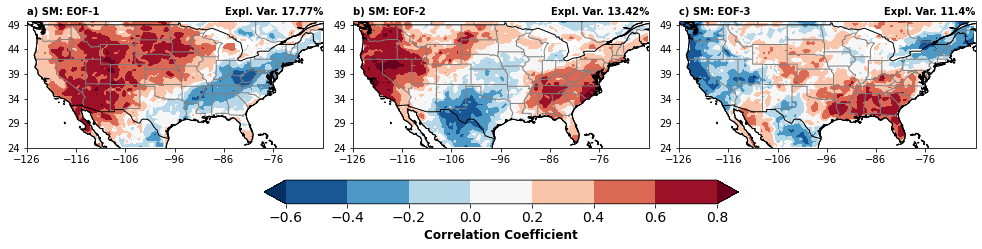

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[17,6], subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'wspace':.1, 'hspace':.22})

#============================================ EOF Spatial Correlation Maps 
cs1 = make_contour_plot(eofs_corr3[0,:,:], var_fracs3[0], 0, 'a) SM: EOF-1')
cs2 = make_contour_plot(eofs_corr3[1,:,:], var_fracs3[1], 1, 'b) SM: EOF-2')
cs3 = make_contour_plot(eofs_corr3[2,:,:], var_fracs3[2], 2, 'c) SM: EOF-3')
#======================== Create colorbar
cbar = plt.colorbar(cs1, ax=ax.ravel().tolist(), orientation='horizontal', shrink=.5, extend='both', pad=0.099)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Correlation Coefficient',fontweight='bold', fontsize=12)



fig.savefig('myplot.png')

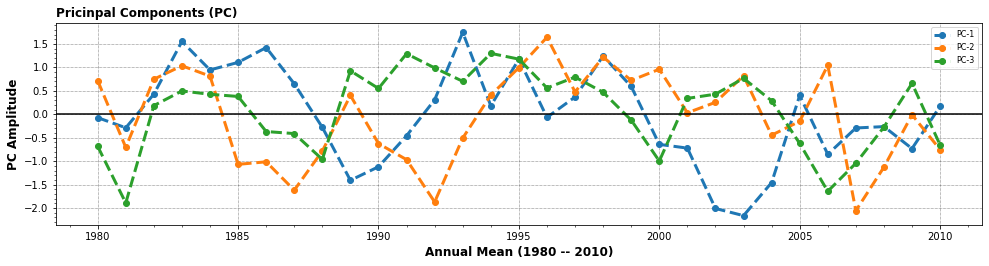

In [14]:
#============================================ EOF Time Series 
years = np.arange(1980, 2011, 1)
eof_amplitudes = [pcs3[:,0], pcs3[:,1], pcs3[:,2]]
eof_labels = ["PC-1", "PC-2", "PC-3"]
title = "Pricinpal Components (PC)"
xlabel = "Annual Mean (1980 -- 2010)"
ylabel = "PC Amplitude"
plot_eofs_over_time(years, eof_amplitudes, eof_labels, title, xlabel, ylabel)
fig.savefig('PC.png')

In [15]:
soil_moisture = data_EX3.mrlsl.sel(levsoi=slice(0,12)).mean('levsoi')*0.38882259051005047
soil_moisture = soil_moisture.mean(dim=['lat', 'lon']).to_dataframe().reset_index()
scaler1=MinMaxScaler()
#========================Transforming the data
y=scaler1.fit_transform(np.array(soil_moisture["mrlsl"]).reshape(-1,1))

In [21]:
#========================Computing the reconstructed soil moisture
exp3_mrlsl = data_EX3.mrlsl.sel(levsoi=slice(0,12)).mean('levsoi')*0.38882259051005047
n_eof = 4
eofs3, pcs3, var_fracs3, lambdas3, eofs_corr3, eof_corrpcs3,reconstruction3 \
                                                                     =EOFsfunction.Emp_Ortho_Funcs(exp3_mrlsl, n_eof)

...Detrending the Data by removing the time-mean...
....Checking Setting Weighting...
....Decomposing Modes of SPMIP Data...
...Correlating.....


In [22]:
Exp3mrlsl_SMreconstructed = xr.DataArray(reconstruction3,
                           coords=exp3_mrlsl.coords, dims=exp3_mrlsl.dims, attrs=data_EX3.attrs)
Exp3mrlsl_SMreconstructedT = Exp3mrlsl_SMreconstructed.mean(dim=("lat","lon"))
#========================Transforming the data
y_reconstructed = scaler1.fit_transform(np.array(Exp3mrlsl_SMreconstructedT).reshape(-1,1))

In [23]:
soil_moisture["time"].values 

array([cftime.DatetimeNoLeap(1980, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 1, 3, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1980, 1, 4, 0, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2010, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2010, 12, 31, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2011, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)

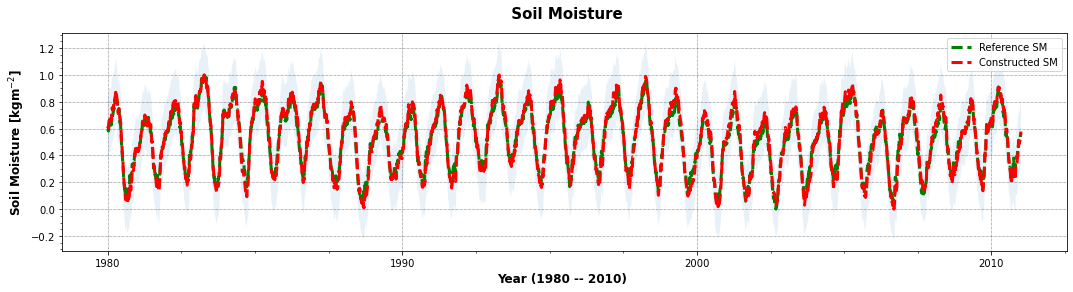

In [24]:
#========================Plotting the Constructed and the reference data 
plt.figure(figsize = (18,4))
plt.plot(soil_moisture["time"],y, linewidth=3,label="Reference SM",
         linestyle='dashed',c="green")
plt.plot(Exp3mrlsl_SMreconstructedT.time, y_reconstructed, linewidth=3,label="Constructed SM",
         linestyle='dashed', c="red")
plt.fill_between(soil_moisture["time"].values, y_reconstructed.reshape(11315)-y_reconstructed.reshape(11315).std(),y_reconstructed.reshape(11315)+y_reconstructed.reshape(11315).std() ,alpha=0.1)
plt.minorticks_on()
plt.ylabel("Soil Moisture [kgm$^{-2}$]",fontweight='bold',  fontsize=12)
plt.title(f" Soil Moisture", pad=15,fontweight='bold', fontsize=15)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel("Year (1980 -- 2010) ",fontweight='bold',fontsize=12)
plt.legend(loc="best")
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()

In [ ]:
plt.fill_between(soil_moisture["time"].values, y_reconstructed.reshape(11315)-y_reconstructed.reshape(11315).std(),y_reconstructed.reshape(11315)+y_reconstructed.reshape(11315).std() ,alpha=0.1)

In [ ]:
##############################

In [26]:
n_eof = 4
#-------------------------Water content Per Unit Area of Soil layers (soil Moisture)
"Computing the mean of the soil moisture at each soil layer "

exp3_mrlsl = data_EX3.mrlsl.sel(levsoi=slice(0,12)).mean('levsoi')*0.38882259051005047


#-------------------------Soil temperature
"Compputing the mean soil temperature at each soil depth"

sExp3_tsl = data_EX3['tsl'].sel(levgrnd=slice(0,2.1)).mean('levgrnd')

#-------------------------Total Evapotranspiration 
sExp3_et = data_EX3['et']


#-------------------------Surface snow melt flux
snm_Exp3 = data_EX3['snm']


In [27]:
tsleofs3, tslpcs3, tslvar_fracs3, tsllambdas3, tsleofs_corr3, tsleof_corrpcs3,reconstruction3 \
                                                                     =EOFsfunction.Emp_Ortho_Funcs(sExp3_tsl , n_eof)

...Detrending the Data by removing the time-mean...
....Checking Setting Weighting...
....Decomposing Modes of SPMIP Data...
...Correlating.....


In [28]:
eteofs3, etpcs3, etvar_fracs3, etlambdas3, eteofs_corr3, eteof_corrpcs3,reconstruction3 \
                                                                     =EOFsfunction.Emp_Ortho_Funcs(sExp3_et, n_eof)

...Detrending the Data by removing the time-mean...
....Checking Setting Weighting...
....Decomposing Modes of SPMIP Data...
...Correlating.....


In [29]:
snmeofs3, snmpcs3, snmvar_fracs3, snmlambdas3, snmeofs_corr3, snmeof_corrpcs3,reconstruction3 \
                                                                     =EOFsfunction.Emp_Ortho_Funcs(snm_Exp3, n_eof)

...Detrending the Data by removing the time-mean...
....Checking Setting Weighting...
....Decomposing Modes of SPMIP Data...
...Correlating.....


In [30]:
#========================Time splits
time_split = [3650, 7865] #[4015, 7300]
timesplit=time_split[1]
#========================Concatinating and Splitting the Input data
x = np.concatenate((tslpcs3, etpcs3, snmpcs3),axis=1)
train_x,test_x = x[:timesplit,:],x[timesplit:,:]

In [96]:

scaler1=MinMaxScaler()
#========================Transforming the data
tsl=scaler1.fit_transform(np.array(sExp3_tsl.mean(dim=("lat","lon"))).reshape(-1,1))
et=scaler1.fit_transform(np.array(sExp3_et.mean(dim=("lat","lon"))).reshape(-1,1))
snm=scaler1.fit_transform(np.array(snm_Exp3.mean(dim=("lat","lon"))).reshape(-1,1))
x_ = np.concatenate((tsl, et, snm),axis=1)
train_x_,test_x_ = x_[:timesplit,:],x_[timesplit:,:]

In [43]:
scaler1=MinMaxScaler()
#========================Transforming the data
y=scaler1.fit_transform(np.array(exp3_mrlsl.mean(dim=("lat","lon"))).reshape(-1,1))

In [47]:
#========================Spliting the Reference and Reconstructed
train_y,test_y = y[:timesplit,:],y[timesplit:,:]
train_reconstructedY,test_reconstructedY = y_reconstructed[:timesplit,:], y_reconstructed[timesplit:,:]

In [102]:
snmpcs3.shape

(11315, 4)

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_51 (Dense)            (None, 40)                160       
                                                                 
 dense_52 (Dense)            (None, 25)                1025      
                                                                 
 dense_53 (Dense)            (None, 2)                 52        
                                                                 
Total params: 1,237
Trainable params: 1,237
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
144/168 [========================>.....] - ETA: 0s - loss: 0.1100 - accuracy: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /home/ksilwimba/NN

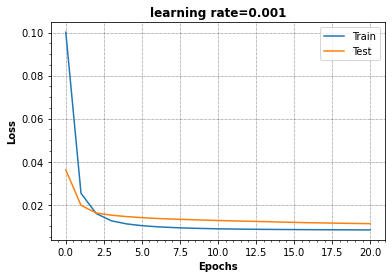

Model Training Completed


In [108]:
#===========================================================================
# Building Neural Networks                                                  
#===========================================================================
def build_nn_model(n_features, n_outputs, hidden_nodes, emb_size, optimizer='adam', lr=1e-3,loss="mse",
                    activation='relu', reg=None):
    """
    Arguments:
        n_features: Number of features
        n_outputs: Number of outputs
        hidden_nodes: int or list of hidden nodes
        emb_size: Embedding size
        max_id: Max embedding ID
        compile: If true, compile model
        optimizer: Name of optimizer
        lr: learning rate
        loss: loss function
        activation: Activation function for hidden layer
    Returns:
        model: Keras model
    """
    if type(hidden_nodes) is not list:
        hidden_nodes = [hidden_nodes]

    features_in = tf.keras.layers.Input(shape=(n_features,))
    x = features_in
    for h in hidden_nodes:
        x = tf.keras.layers.Dense(h, activation=activation, kernel_regularizer=reg)(x)
    x = tf.keras.layers.Dense(n_outputs, activation='linear', kernel_regularizer=reg)(x)
    model = tf.keras.models.Model(inputs=[features_in], outputs=x)
    return model

#===========================================================================
# Neural Networks with Reference Y Input
#===========================================================================

in_shape = 3
batch_size = 47
model_save = "/home/ksilwimba/NN_SM.ckpt"
model_nn = build_nn_model(in_shape,2,[40,25],10,loss="mse")
modsave = tf.keras.callbacks.ModelCheckpoint(model_save, monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=True,
                                             mode='auto',include_optimizer=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.092,patience=20, min_lr=0.001,verbose=1)
er_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0, patience=20, verbose=1, mode='auto',baseline=None, 
                                           restore_best_weights=False)
opt = tf.optimizers.Adam(learning_rate=1e-3) 
model_nn.compile(optimizer=opt, loss="mse",metrics=['accuracy'])
model_nn.summary()
callbacks=[modsave,reduce_lr,er_stop]
#=======================Reference Data
history_nn = model_nn.fit(train_x_,train_y,batch_size=batch_size,epochs=100,shuffle=False,\
        callbacks=callbacks,validation_data=(test_x_,test_y))

#=======================Reconstructed Data
# Recon_history_nn = model_nn.fit(train_x,train_reconstructedY,batch_size=batch_size,epochs=100,shuffle=False,\
#         callbacks=callbacks,validation_data=(test_x,test_reconstructedY))

#========================Predicting soil Moisture 
nnTrain_soilmoisture = model_nn.predict(train_x_)
nnpredict_soilmoisture = model_nn.predict(test_x_)

#========================Scaling the True Soil moisture
true_y  = scaler1.fit_transform(np.array(soil_moisture["mrlsl"]).reshape(-1,1)[timesplit:])
trueY_soilmoisture = scaler1.fit_transform(np.array(soil_moisture["mrlsl"]).reshape(-1,1)[timesplit:])
#========================Plot learning curve
plt.plot(history_nn.history['loss'],label='Train')
plt.plot(history_nn.history['val_loss'],label='Test')
plt.xlabel("Epochs",fontweight='bold', fontsize=10)
plt.ylabel("Loss" ,fontweight='bold', fontsize=10)
plt.title('learning rate='+str(1e-3), fontweight='bold', fontsize=12)#learning_rates[4]
plt.minorticks_on()
plt.legend()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()
print('Model Training Completed')
#print('Finish Time:%d s' %(int(time.time()-start)))

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 12)]              0         
                                                                 
 dense_54 (Dense)            (None, 40)                520       
                                                                 
 dense_55 (Dense)            (None, 25)                1025      
                                                                 
 dense_56 (Dense)            (None, 2)                 52        
                                                                 
Total params: 1,597
Trainable params: 1,597
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
151/168 [=========================>....] - ETA: 0s - loss: 0.1113 - accuracy: 1.4090e-04
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /home/ksilwimba/NN_

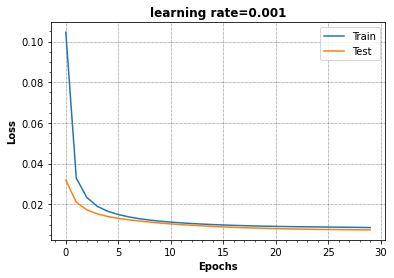

Model Training Completed


In [109]:
#===========================================================================
# Neural Networks with Reconstructed Y Input
#===========================================================================

"Fitting the neural networks with the same parameters as above and compare the accuracy"
in_shape2 = 12
batch_size2 = 47
model_save2 = "/home/ksilwimba/NN_SMR.ckpt"
model_nn2 = build_nn_model(in_shape2,2,[40,25],10,loss="mse")
modsave2 = tf.keras.callbacks.ModelCheckpoint(model_save2, monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=True,
                                             mode='auto',include_optimizer=False)
reduce_lr2 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.092,patience=15, min_lr=0.001,verbose=1)
er_stop2 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.000, patience=20, verbose=1, mode='auto',baseline=None, 
                                           restore_best_weights=False)
opt2 = tf.optimizers.Adam(learning_rate=1e-3) 
model_nn2.compile(optimizer=opt2, loss="mse",metrics=['accuracy'])
model_nn2.summary()
callbacks=[modsave2,reduce_lr2,er_stop2]

#=======================Reconstructed Data
Recon_history_nn = model_nn2.fit(train_x,train_reconstructedY,batch_size=batch_size2,epochs=30,shuffle=False,\
        callbacks=callbacks,validation_data=(test_x,test_reconstructedY))#validation_split=0.1

#========================Predicting soil Moisture 
nnTrain_soilmoistureR = model_nn2.predict(train_x)
nnTest_soilmoistureR = model_nn2.predict(test_x)

reconstructed_Y = y_reconstructed.reshape(-1,1)[timesplit:]
#========================Plot learning curve
plt.plot(Recon_history_nn.history['loss'],label='Train',markeredgewidth=2.2)
plt.plot(Recon_history_nn.history['val_loss'],label='Test')
plt.xlabel("Epochs",fontweight='bold', fontsize=10)
plt.ylabel("Loss" ,fontweight='bold', fontsize=10)
plt.title('learning rate='+str(1e-3), fontweight='bold', fontsize=12)#learning_rates[4]
plt.minorticks_on()
plt.legend()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.show()
print('Model Training Completed')
#print('Finish Time:%d s' %(int(time.time()-start)))

In [ ]:
# plt.figure(figsize=(13,5))

# #=================================Scatter plot of the soil moisture reference SPMIP data and Simmulated data
# plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.2)
# plt.subplot(1,2,1)
# plt.plot(true_y, nnTest_soilmoistureR[:,0],'o',  c="green", \
#          markerfacecolor = 'white', markersize = 8, markeredgewidth=2.2)

# plt.ylabel('Soil moisture [kg/m$^{2}$]',fontweight='bold',fontsize=10)
# plt.xlabel('CLM Output [kg/m$^{2}$]',fontweight='bold',fontsize=10)
# plt.plot([0, 1.0917076], [0, 1.0917076], zorder=0.1, c='red',linestyle='dashed', linewidth=3)
# plt.title("Predicted vs CLM Soil Moisture ", pad=15, fontweight='bold', fontsize=12)#[kg/m$^{2}$]
# plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')

# #=================================Histogram of the soil moisture reference SPMIP data and NN predicted data
# plt.subplot(1,2,2)
# plt.hist(true_y, bins=10, label="CLM Output")
# plt.hist(nnTest_soilmoistureR[:,0], bins=10, alpha=0.8, label="Predicted")
# plt.ylabel("Frequency",fontweight='bold',fontsize=10)
# plt.xlabel('Soil Moisture [kg/m$^{2}$]',fontweight='bold',fontsize=10)#[kg/m$^{2}$]
# plt.title("Predicted vs CLM Soil Moisture ", pad=15, fontweight='bold', fontsize=12)#[kg/m$^{2}$]
# plt.minorticks_on()
# plt.grid(linestyle=':', linewidth=0.5, color='k')
# plt.legend()
# plt.show()

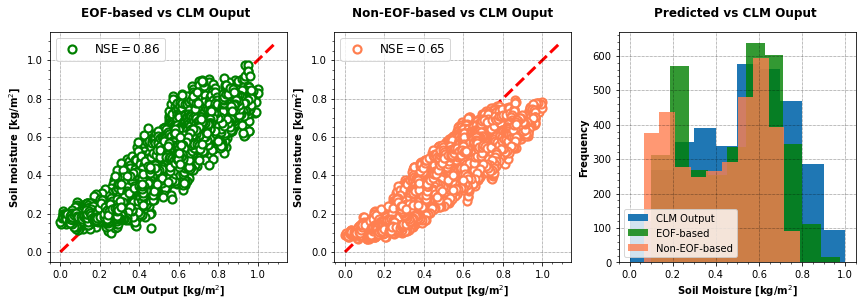

In [148]:
plt.figure(figsize=(14,4))

#=================================Scatter plot of the soil moisture reference SPMIP data and Simmulated data
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.2)
plt.subplot(1,3,1)
plt.plot(true_y, nnTest_soilmoistureR[:,0],'o',  c="green", \
         markerfacecolor = 'white', markersize = 8, markeredgewidth=2.2,label=r'NSE$=0.86$')
plt.legend(fontsize=12)
plt.ylabel('Soil moisture [kg/m$^{2}$]',fontweight='bold',fontsize=10)
plt.xlabel('CLM Output [kg/m$^{2}$]',fontweight='bold',fontsize=10)
plt.plot([0, 1.0917076], [0, 1.0917076], zorder=0.1, c='red',linestyle='dashed', linewidth=3)
plt.title("EOF-based vs CLM Ouput ", pad=15, fontweight='bold', fontsize=12)#[kg/m$^{2}$]
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')

plt.subplot(1,3,2)
plt.plot(true_y, nnpredict_soilmoisture[:,0],'o',  c="coral", \
         markerfacecolor = 'white', markersize = 8, markeredgewidth=2.2,label=r'NSE$=0.65$')
plt.legend(fontsize=12)
plt.ylabel('Soil moisture [kg/m$^{2}$]',fontweight='bold',fontsize=10)
plt.xlabel('CLM Output [kg/m$^{2}$]',fontweight='bold',fontsize=10)
plt.plot([0, 1.0917076], [0, 1.0917076], zorder=0.1, c='red',linestyle='dashed', linewidth=3)
plt.title("Non-EOF-based vs CLM Ouput", pad=15, fontweight='bold', fontsize=12)#[kg/m$^{2}$]
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')

#=================================Histogram of the soil moisture reference SPMIP data and NN predicted data
plt.subplot(1,3,3)
plt.hist(true_y, bins=10,label="CLM Output" )
plt.hist(nnTest_soilmoistureR[:,0], bins=10,color='green', alpha=0.8, label="EOF-based")
plt.hist(nnpredict_soilmoisture[:,0], bins=10, color='coral', alpha=0.8, label="Non-EOF-based")
plt.ylabel("Frequency",fontweight='bold',fontsize=10)
plt.xlabel('Soil Moisture [kg/m$^{2}$]',fontweight='bold',fontsize=10)#[kg/m$^{2}$]
plt.title("Predicted vs CLM Ouput ", pad=15, fontweight='bold', fontsize=12)#[kg/m$^{2}$]
plt.minorticks_on()
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.legend(loc='lower left')
plt.show()

In [88]:
plt.fill_between(year, np.delete(Exp4amrlsl_SMreconstructedT,-1)-np.delete(Exp4amrlsl_SMreconstructedT,-1), \
                 np.delete(Exp4amrlsl_SMreconstructedT,-1)+np.delete(Exp4amrlsl_SMreconstructedT,-1) ,alpha=0.1)

(3450, 2)

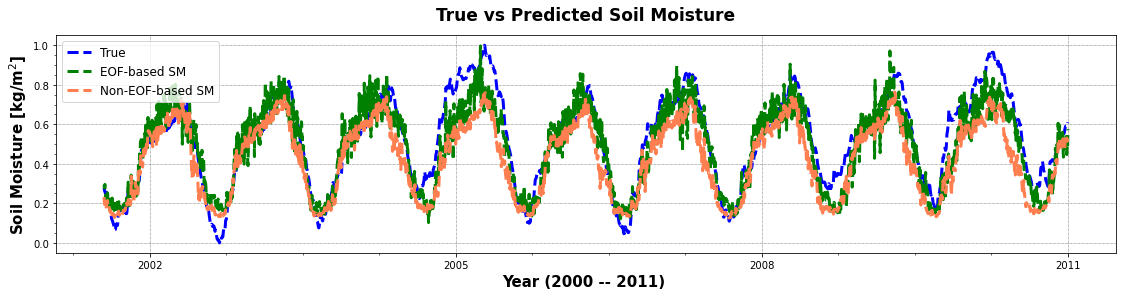

In [151]:
plt.figure(figsize=(19,4))
plt.plot(soil_moisture["time"][timesplit:],trueY_soilmoisture,label='True',\
         color = 'blue',linestyle='dashed', linewidth = 3)
plt.plot(soil_moisture["time"][timesplit:],nnTest_soilmoistureR[:,1],label='EOF-based SM',\
         color = 'green',linestyle='dashed', linewidth = 3)

plt.plot(soil_moisture["time"][timesplit:],nnpredict_soilmoisture[:,1],label='Non-EOF-based SM',\
         color = 'coral',linestyle='dashed', linewidth = 3)
plt.ylabel(f"Soil Moisture [kg/m$^{2}$]",fontweight='bold', fontsize=15)
#plt.xlabel("Year (2000 -- 2011) ",fontweight='bold',fontsize=12)
plt.title("True vs Predicted Soil Moisture", pad=15, fontweight='bold', fontsize=17)
plt.minorticks_on()
plt.legend(loc="upper left", fontsize=12)
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.xlabel("Year (2000 -- 2011) ",fontweight='bold',fontsize=15)
plt.show()

In [129]:
#==========================================================================
#    Model Metric Performance of the Emulators
#==========================================================================

#===================== Neural Networks with Constructed Y Data Performance Metrics  
nn_sum_a = sum([(reconstructed_Y[i]-nnTest_soilmoistureR[:,0][i])**2 for i in range(len(reconstructed_Y))])
nn_sum_b = sum([(reconstructed_Y[i]-np.mean(reconstructed_Y))**2 for i in range(len(reconstructed_Y))])
nn_NSE = 1-nn_sum_a/nn_sum_b

print("==================NN-Reconstructed Y Performance Metrics")#trueY_soilmoisture
print('NN NSE Value:%.4f' %nn_NSE) 
print('R2 value: %.4f' %r2_score(reconstructed_Y,nnTest_soilmoistureR[:,0]))
print('RMSE: %.4f' %(np.sqrt(mean_squared_error(reconstructed_Y,nnTest_soilmoistureR[:,0]))))
print('MAE: %.4f' %(mean_absolute_error(reconstructed_Y,nnTest_soilmoistureR[:,0])))

print()
print()
#===================== Neural Networks with Unconstructed Y Data Performance Metrics

#===================== NN Performance Metrics  
mlp_sum_a=sum([(true_y[i]-nnpredict_soilmoisture[:,0][i])**2 for i in range(len(true_y))])
mlp_sum_b=sum([(true_y[i]-np.mean(true_y))**2 for i in range(len(true_y))])
mlp_NSE=1-mlp_sum_a/mlp_sum_b

print("==================NN-Unconstructed Y Performance Metrics")
print('NN NSE Value:%.4f' %mlp_NSE) 
print('R2 value: %.4f' %r2_score(true_y,nnpredict_soilmoisture[:,0]))
print('RMSE: %.4f' %(np.sqrt(mean_squared_error(true_y,nnpredict_soilmoisture[:,0]))))
print('MAE: %.4f' %(mean_absolute_error(true_y,nnpredict_soilmoisture[:,0])))

print()
print()


==================NN-Reconstructed Y Performance Metrics
NN NSE Value:0.8605
R2 value: 0.8605
RMSE: 0.0857
MAE: 0.0686


==================NN-Unconstructed Y Performance Metrics
NN NSE Value:0.6499
R2 value: 0.6499
RMSE: 0.1354
MAE: 0.1074


